# Loading NYC Yellow Taxi Data with Dask

This notebook demonstrates how to load NYC Yellow Taxi trip data from local parquet files into a Dask DataFrame.

## Data Source
- **Dataset**: NYC Yellow Taxi Trip Data (2023)
- **Location**: `/home/yfreund/taxi/Dataset/2023/yellow_taxi/`
- **Format**: Parquet files
- **Files**: `yellow_tripdata_2023-0*.parquet` (Jan-Sep 2023)

In [1]:
# Import required libraries
import dask.dataframe as dd
import pandas as pd
import numpy as np
from pathlib import Path
import glob

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Parquet Files into Dask DataFrame

In [2]:
# Define the parquet file pattern
PARQUET_PATTERN = "/home/yfreund/taxi/Dataset/2023/yellow_taxi/yellow_tripdata_2023-0*.parquet"

# Find all matching files
parquet_files = sorted(glob.glob(PARQUET_PATTERN))
print(f"Found {len(parquet_files)} parquet files:")
for f in parquet_files:
    print(f"  - {Path(f).name}")

Found 9 parquet files:
  - yellow_tripdata_2023-01.parquet
  - yellow_tripdata_2023-02.parquet
  - yellow_tripdata_2023-03.parquet
  - yellow_tripdata_2023-04.parquet
  - yellow_tripdata_2023-05.parquet
  - yellow_tripdata_2023-06.parquet
  - yellow_tripdata_2023-07.parquet
  - yellow_tripdata_2023-08.parquet
  - yellow_tripdata_2023-09.parquet


In [3]:
# Load all parquet files into a Dask DataFrame
# Handle schema differences by loading each file and concatenating with outer join
import pandas as pd

frames = []
for file_path in parquet_files:
    df = dd.read_parquet(file_path)
    frames.append(df)

# Concatenate with outer join to handle missing columns (fills with NaN)
taxi_df = dd.concat(frames, join='outer', ignore_index=True)

print(f"Dask DataFrame created successfully!")
print(f"Number of partitions: {taxi_df.npartitions}")
print(f"Columns: {list(taxi_df.columns)}")

Dask DataFrame created successfully!
Number of partitions: 9
Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']


## Basic DataFrame Information

In [4]:
# Get approximate shape (computed)
n_rows = len(taxi_df)
n_cols = taxi_df.shape[1]

print(f"Approximate shape: ({n_rows:,} rows, {n_cols} columns)")
print(f"\nData types:")
print(taxi_df.dtypes)

Approximate shape: (28,071,659 rows, 20 columns)

Data types:
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
Airport_fee                     float64
dtype: object


In [5]:
# Display first few rows
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,NaN
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,NaN
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,NaN
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,NaN


In [6]:
# Get a sample from the first partition (safer than sample() across all partitions)
# This avoids issues with schema differences across parquet files
first_partition = taxi_df.get_partition(0).head(100)
print(f"Sample from first partition (100 rows):")
first_partition

Sample from first partition (100 rows):


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,NaN
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,NaN
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,NaN
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2023-01-01 00:20:38,2023-01-01 00:21:26,1.0,0.08,1.0,N,75,75,2,3.0,1.00,0.5,0.00,0.0,1.0,5.50,0.0,0.00,NaN
96,2,2023-01-01 00:09:16,2023-01-01 00:30:17,1.0,6.22,1.0,N,138,95,2,31.0,6.00,0.5,0.00,0.0,1.0,39.75,0.0,1.25,NaN
97,2,2023-01-01 00:46:56,2023-01-01 00:59:16,1.0,4.56,1.0,N,132,218,1,20.5,1.00,0.5,5.75,0.0,1.0,30.00,0.0,1.25,NaN
98,2,2023-01-01 00:10:50,2023-01-01 00:20:19,1.0,1.41,1.0,N,264,186,1,10.7,1.00,0.5,3.92,0.0,1.0,19.62,2.5,0.00,NaN


## Data Summary Statistics

*Note: Computing statistics on large datasets may take time. Only compute when needed.*

In [7]:
# Compute descriptive statistics for numeric columns
# This may take a while for large datasets
taxi_df.describe().compute()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
count,2.807166e+07,2.722991e+07,2.807166e+07,2.722991e+07,2.807166e+07,2.807166e+07,2.807166e+07,2.807166e+07,2.807166e+07,2.807166e+07,2.807166e+07,2.807166e+07,2.807166e+07,2.807166e+07,2.722991e+07,2.995023e+06,2.423489e+07
mean,1.736141e+00,1.368781e+00,4.213219e+00,1.606550e+00,1.650534e+02,1.637495e+02,1.190868e+00,1.942180e+01,1.577724e+00,4.862610e-01,3.497600e+00,5.850816e-01,9.802552e-01,2.833553e+01,2.262624e+00,1.074086e-01,1.413636e-01
std,4.465795e-01,8.951748e-01,2.647084e+02,7.200710e+00,6.399800e+01,6.994180e+01,5.488623e-01,8.771540e+01,2.639342e+00,1.066223e-01,4.067512e+00,2.183569e+00,1.947843e-01,8.893386e+01,7.956931e-01,3.556511e-01,4.699966e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.599000e+02,-1.000000e+01,-5.000000e-01,-4.110000e+02,-9.130000e+01,-1.000000e+00,-9.829500e+02,-2.500000e+00,-1.250000e+00,-1.750000e+00
25%,1.000000e+00,1.000000e+00,1.090000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.615000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.830000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.420000e+01,1.000000e+00,5.000000e-01,2.880000e+00,0.000000e+00,1.000000e+00,2.184000e+01,2.500000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.610000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.400000e+01,2.500000e+00,5.000000e-01,4.600000e+00,0.000000e+00,1.000000e+00,3.276000e+01,2.500000e+00,0.000000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.457294e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.869836e+05,1.000250e+04,5.316000e+01,9.843000e+02,6.655600e+02,1.000000e+00,3.869876e+05,2.750000e+00,1.250000e+00,1.750000e+00


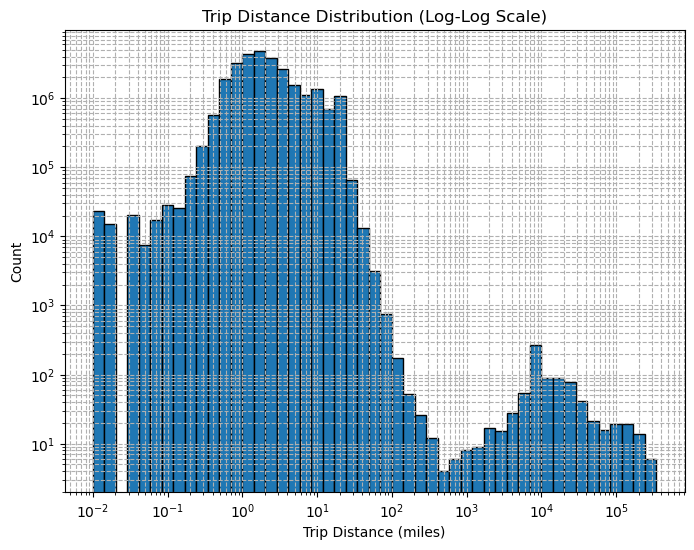

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Compute trip_distance value counts (histogram)
trip_distances = taxi_df['trip_distance'].dropna().compute()

plt.figure(figsize=(8,6))
# Make bins logarithmically spaced, but avoid zero distance
min_nonzero = trip_distances[trip_distances > 0].min()
bins = np.logspace(np.log10(min_nonzero), np.log10(trip_distances.max()), 50)
plt.hist(trip_distances[trip_distances > 0], bins=bins, edgecolor='black', log=True)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Count')
plt.title('Trip Distance Distribution (Log-Log Scale)')
plt.grid(True, which="both", ls="--")
plt.show()


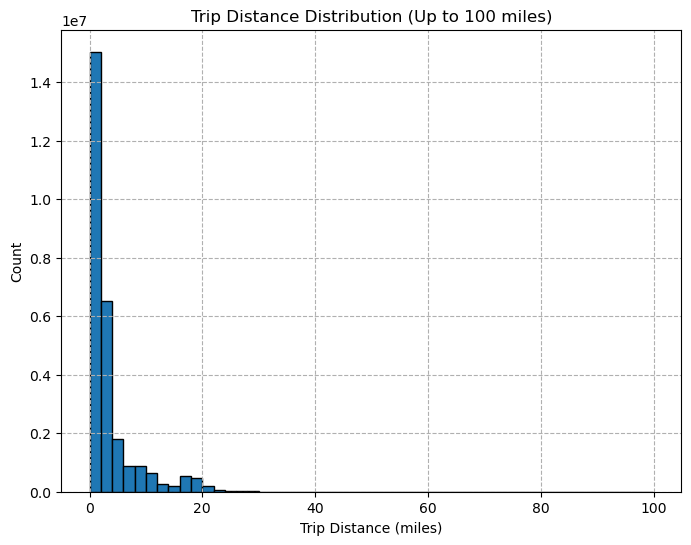

In [10]:
# Plot histogram of trip distance for trips up to 100 miles (linear axes)
trip_distances_under_100 = trip_distances[(trip_distances > 0) & (trip_distances <= 100)]

plt.figure(figsize=(8,6))
plt.hist(trip_distances_under_100, bins=50, edgecolor='black')  # No log scale
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Count')
plt.title('Trip Distance Distribution (Up to 100 miles)')
plt.grid(True, which="both", ls="--")
plt.show()


In [11]:
# Estimate fraction of trips whose distance is exactly zero miles
total_trips = len(trip_distances)
zero_distance_trips = (trip_distances == 0).sum()
fraction_zero_distance = zero_distance_trips / total_trips

print(f"Fraction of trips with zero distance: {fraction_zero_distance:.6f}")


Fraction of trips with zero distance: 0.016951


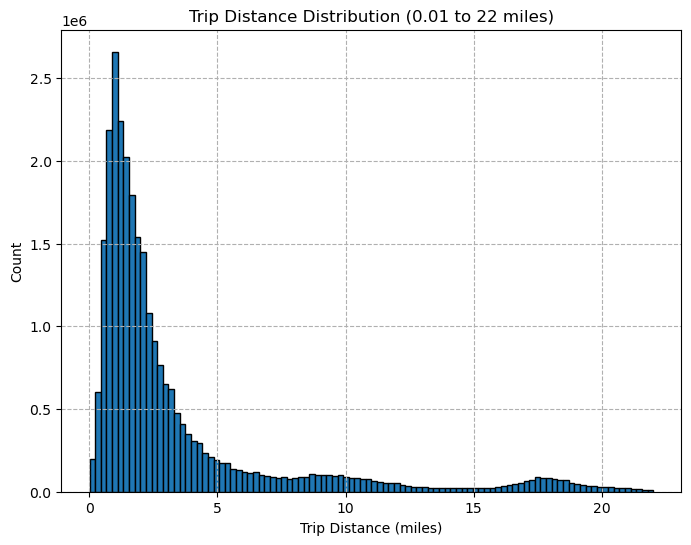

In [12]:
# Plot histogram of trip distance between 0.01 mile and 22 miles, using 100 bins
trip_distances_filtered = trip_distances[(trip_distances >= 0.01) & (trip_distances <= 22)]

plt.figure(figsize=(8,6))
plt.hist(trip_distances_filtered, bins=100, edgecolor='black')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Count')
plt.title('Trip Distance Distribution (0.01 to 22 miles)')
plt.grid(True, which="both", ls="--")
plt.show()
